# pyXEM Tutorial

This tutorial is designed as a quick walk-through to the functions avaible through pyXEM.  It will not cover everything and if you want to further explore pyxem a better place to satart is with the pyxem-demos which will offer more indepth instrucution on using pyxem. 

This demo is designed to work with pyxem version 13.3.  If you don't have version 13.3 installed it is a good idea to update your version of pyxem so that things work as intended. 

-- csfrancis@wisc.edu --

Monday July 26, 2021

1. <a href='#pr'> Printing Known Signal Types</a>
2. <a href='#vdf'>  Virtual Diffraction Imaging</a>
3. <a href='#vf'> Virtual Diffraction Imaging</a>
4. <a href='#ml'> Machine Learning SPED Data</a>
5. <a href='#vec'> Peak Finding</a>

In [1]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import diffpy

/home/carter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/carter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=Tr

<a id='pr'></a>

## Printing Known Signal Types

Pyxem **extends** hyperspy.  This means that for most operations you won't have to load pyxem once pyxem is downloaded.  With the [``hyperspy bundle``](http://hyperspy.org/hyperspy-doc/current/user_guide/install.html#hyperspy-bundle) this is very easy as you can use anaconda to easily download and install the necessary packages. 

A good first step in any operation is to print the known signal types. This is very helpful to:

**1- Check that packages like pyxem/kikuchipy/atomap etc. are loaded**

**2- Use as a reference when changing signal types**

In [2]:
hs.print_known_signal_types()

signal_type,aliases,class name,package
beam_shift,,BeamShift,pyxem
correlation,,Correlation2D,pyxem
CorrelationSignal,,CorrelationSignal,empyer
dpc,,DPCBaseSignal,pyxem
dpc,,DPCSignal1D,pyxem
dpc,,DPCSignal2D,pyxem
DielectricFunction,dielectric function,DielectricFunction,hyperspy
diffraction,,Diffraction1D,pyxem
diffraction,,Diffraction2D,pyxem
DiffractionSignal,,DiffractionSignal,empyer


<a href='#lo'></a>
## 1. Loading & Visualization

Loading data into pyxem is just as easy as loading data into hyperspy. We can call the load function from hyperspy and load the data. 

See how the data is loaded as a Diffraction2D Signal already, this is because hyperspy remembers the Signal type if you save the data. 

In [3]:
dp = hs.load('./data/01/twinned_nanowire.hdf5')
print(dp)

ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


<Diffraction2D, title: , dimensions: (30, 100|144, 144)>


### 1.1 Changing Signal Type
You can also change the Signal type after the fact.  In this case we want to work with electron diffraction data so we use the `set_signal_type` function to change the signal using the alais shown above from the `print_known_signals` function.

In [4]:
dp.set_signal_type('electron_diffraction')
print(dp)
display(dp.metadata)

<ElectronDiffraction2D, title: , dimensions: (30, 100|144, 144)>


├── Acquisition_instrument
│   └── TEM
│       ├── beam_energy = 300.0
│       ├── camera_length = 0.21000000000000002
│       └── scan_rotation = 277.0
├── General
│   ├── original_filename = nanowire_precession.blo
│   ├── time = (2014, 12, 8)
│   └── title = 
└── Signal
    ├── binned = False
    ├── signal_origin = 
    └── signal_type = electron_diffraction

### 1.2 Adjusting the Axes Scale & Metadata

In many cases data will not be loaded with appropiate units/ experimental parameters or scale.  Hyperspy is usually pretty good at reading this from the file but often times that data will have to be added after. We can fix this by manually setting this for our dataset.

In [5]:
dp.beam_energy = 300
dp.metadata.Acquisition_instrument.TEM.camera_length =21 
dp.metadata.Acquisition_instrument.TEM.scan_rotation = 277
dp.metadata.Acquisition_instrument.TEM.convergence_angle =0.7
dp.metadata.Acquisition_instrument.TEM.exposure_time =10.0
dp.metadata.General.title = 'GaAs Nanowire'

In [6]:
dp.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── beam_energy = 300
│       ├── camera_length = 21
│       ├── convergence_angle = 0.7
│       ├── exposure_time = 10.0
│       └── scan_rotation = 277
├── General
│   ├── original_filename = nanowire_precession.blo
│   ├── time = (2014, 12, 8)
│   └── title = GaAs Nanowire
└── Signal
    ├── binned = False
    ├── signal_origin = 
    └── signal_type = electron_diffraction

In [7]:
transformed_dp = dp.apply_affine_transformation(np.array([[0.99,0,0],
                                                          [0,0.69,0],
                                                          [0,0,1]]),
                                                keep_dtype=True,
                                                inplace=False)

# Centering the Direct Beam
transformed_dp.center_direct_beam(method='cross_correlate',
                                             radius_start=2,
                                             radius_finish=5,
                                             half_square_width=10, )
transformed_dp.axes_manager[2].offset = transformed_dp.axes_manager[2].size/2
transformed_dp.axes_manager[3].offset = transformed_dp.axes_manager[3].size/2


[########################################] | 100% Completed | 14.6s


In [8]:
hs.plot.plot_images?

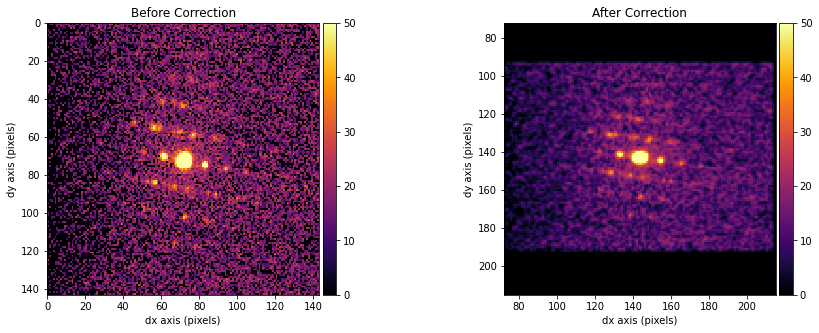

In [9]:
f= plt.figure(figsize=(15,5))
hs.plot.plot_images([dp.inav[0,0],transformed_dp.inav[0,0]], fig=f,cmap='inferno', vmax=50, label = ["Before Correction", "After Correction"])
plt.show()

### 1.3 Adjusting the Axes Scale & Metadata

In many cases data will not be loaded with appropiate units/ experimental parameters or scale.  Hyperspy is usually pretty good at reading this from the file but often times that data will have to be added after. We can fix this by manually setting this for our dataset.

In this case we want to look at the inter planer spacing to determine the scale bar.

#### Side Note:

If you want to do this interactively you need to make sure you are using a backend for matplotlib which is interactive.  For the most part ``%matplotlib notebook`` should work.

Interact with the plot as necessary and then if you compute the cell below it will update with line profile of the area of interest. 

<IPython.core.display.Javascript object>


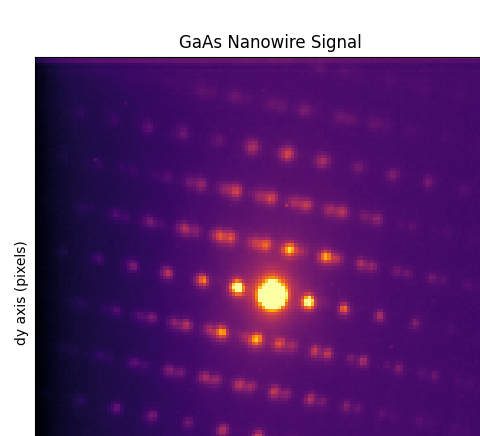

In [10]:
%matplotlib notebook
dpm = dp.mean((0,1))
dpm.plot(cmap='inferno', vmax=50)
line = hs.roi.Line2DROI(x1=25.8525, y1=64.5691, x2=120.907, y2=77.0079, linewidth=5.49734)
line.add_widget(dpm)

<IPython.core.display.Javascript object>


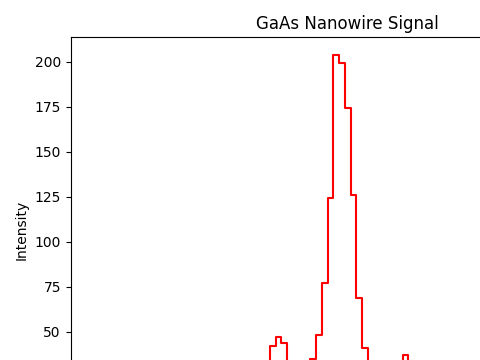

In [11]:
trace = line(dpm)
trace = trace.as_signal1D(spectral_axis=0)
trace.plot()

In [12]:
peaks = trace.find_peaks1D_ohaver()
markers = [hs.plot.markers.vertical_line(x=peak[0], color='red') for peak in peaks[0]]
tmarkers = [hs.plot.markers.text(x=peak[0], y=50,text=np.round(peak[0],3), color='red') for peak in peaks[0]]
trace.add_marker(markers, permanent=True)
trace.add_marker(tmarkers, permanent=True)

<IPython.core.display.Javascript object>


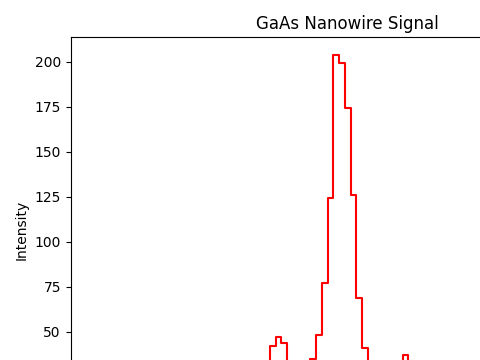

In [13]:
trace.plot(plot_markers=True)

In [14]:
pixel_d111 = (67.242-24.542)/4
GaAs_dspacing =5.75018263
recip_d111 = np.sqrt((3/GaAs_dspacing**2))
recip_cal = recip_d111 / pixel_d111
dp.set_scan_calibration(10)
dp.set_diffraction_calibration(recip_cal)
dp.unit = "k_A^-1"

In [15]:
dp.axes_manager

<Axes manager, axes: (30, 100|144, 144)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |     30 |      0 |       0 |      10 |     nm 
               y |    100 |      0 |       0 |      10 |     nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
              kx |    144 |        |      -2 |   0.028 | k_A^-1 
              ky |    144 |        |      -2 |   0.028 | k_A^-1

<IPython.core.display.Javascript object>


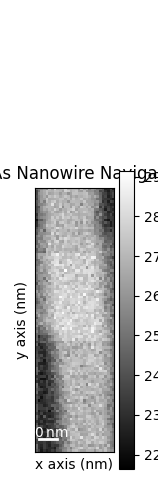

<IPython.core.display.Javascript object>


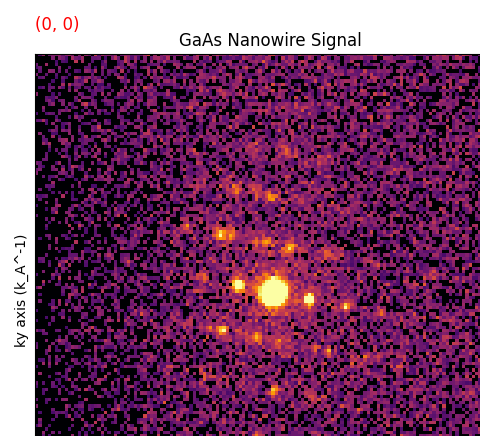

In [16]:
dp.plot(cmap='inferno', vmax=50)

<a href='#vdf'></a>

## 2. Virtual Diffraction Imaging
Now it is pretty easy to create a Virtual Diffraction Image using hyperspy's ROI tools.

We 

<IPython.core.display.Javascript object>


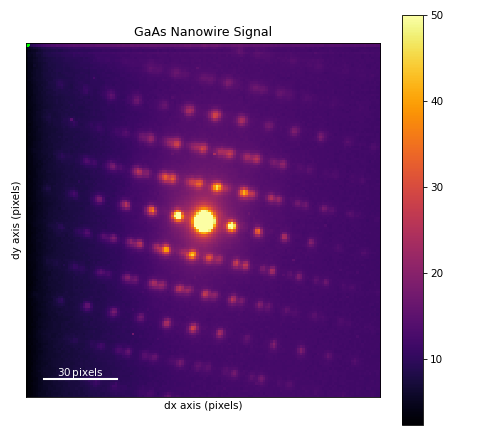

<IPython.core.display.Javascript object>


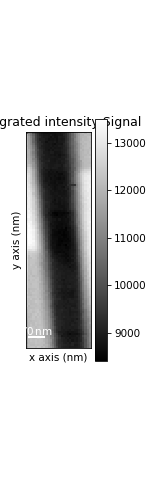

In [17]:
dpm.plot(cmap='inferno', vmax=50)
roi = hs.roi.CircleROI(cx=0,cy=0, r_inner=0, r=0.2)
roi.add_widget(dpm)
dp.plot_integrated_intensity(roi)

In [18]:
vdf = dp.get_integrated_intensity(roi)

<IPython.core.display.Javascript object>


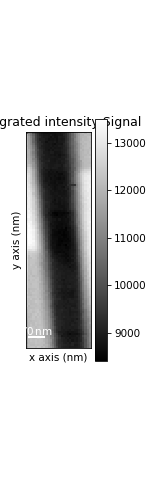

<Signal2D, title: Integrated intensity, dimensions: (|30, 100)>


In [19]:
vdf.plot()
print(vdf)

### 2.1 Using the Virtual Image Generator to form multiple images. 

From pyxem we can also load the virtual Image generator to form images from different annular ranges. 

In [20]:
from pyxem.generators.virtual_image_generator import VirtualImageGenerator

In [21]:
vdfgen = VirtualImageGenerator(dp)
vdfs = vdfgen.get_concentric_virtual_images(k_min=0,
                                        k_max=1,
                                        k_steps=10)

<IPython.core.display.Javascript object>


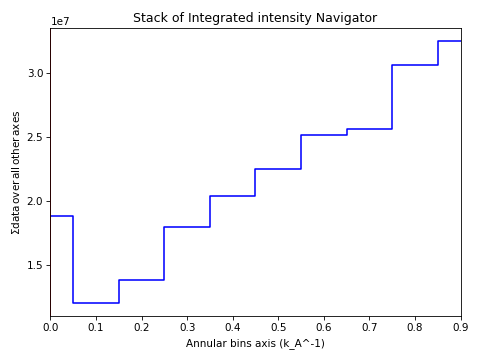

<IPython.core.display.Javascript object>


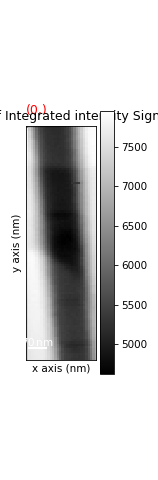

In [22]:
vdfs.plot()

### 3.3 Select a region in the scan

<IPython.core.display.Javascript object>


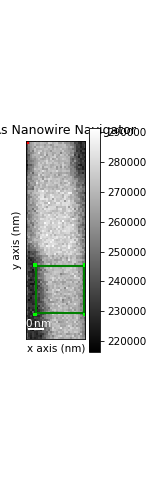

<IPython.core.display.Javascript object>


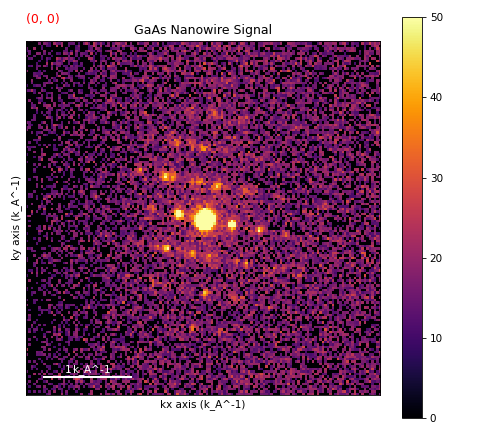

In [23]:
reg = hs.roi.RectangularROI(left=50, top=630, right=290, bottom=870)
dp.plot(cmap='inferno', vmax=50)
reg.add_widget(dp)

Calling the marker `reg(dp` crops the signal using the ROI. 

<IPython.core.display.Javascript object>


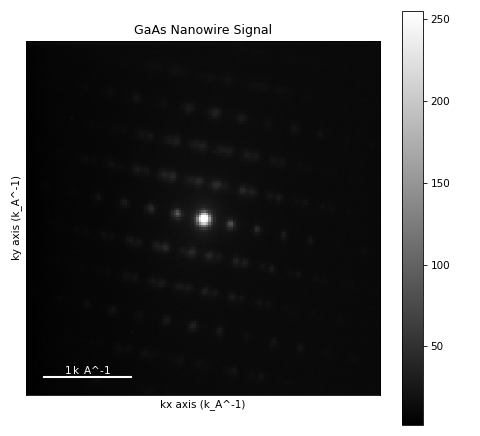

In [24]:
dpc = reg(dp)
dpc.mean().plot()

### 3 Using Machiene Learning:

We are going to use Non-negitivie Matrix factorization (NMF) to help segement our image. 

This is particularly useful becuase unlike SVD or PCA it applies the constraint that every value needs to be positive (which is particualarly important in our case where we can assume that each component is positive. 

More information on what ```hyperspy``` is calling : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF

In [25]:
dp.data = dp.data.astype('float64')
dp.decomposition(algorithm= "NMF",output_dimension=4)

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=NMF
  output_dimension=4
  centre=None
scikit-learn estimator:
NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=4, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)


<IPython.core.display.Javascript object>


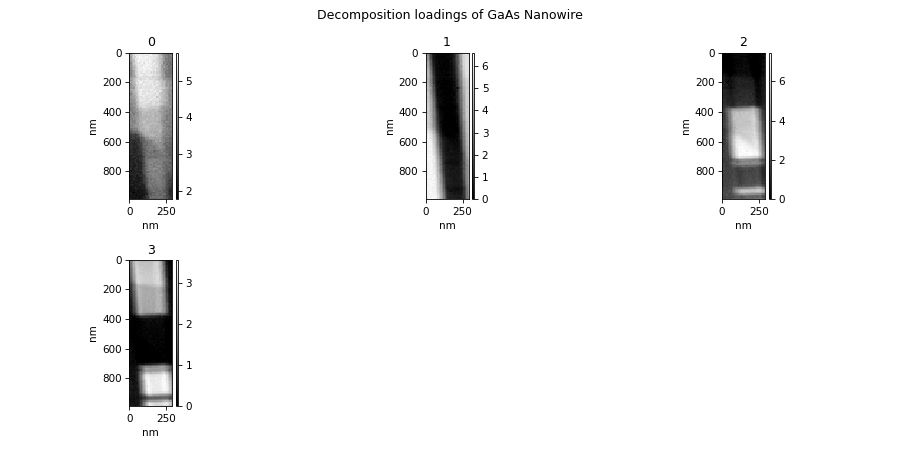

<IPython.core.display.Javascript object>


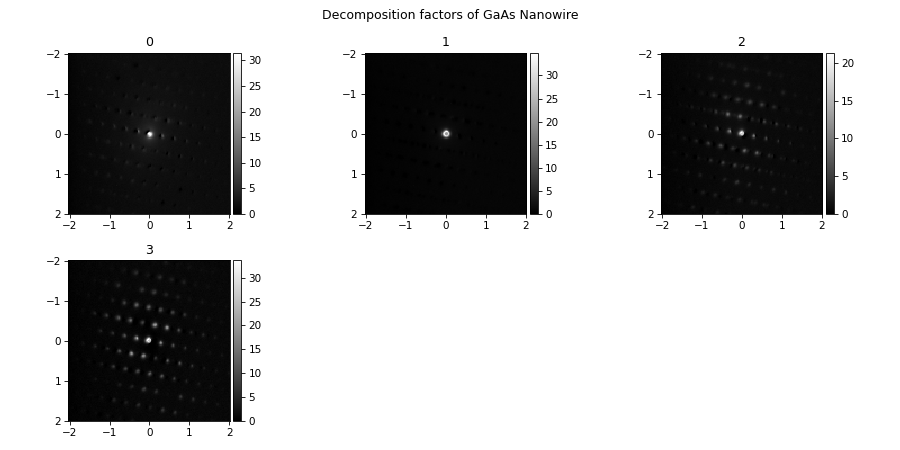

In [26]:
dp.plot_decomposition_loadings()
dp.plot_decomposition_factors()
plt.show()

### 4 Peak Finding:

Pyxem also implements the hyperspy peak-finding algorithm which can be tuned to help identify diffraction spots.  

This helps define diffraction vectors which can be used for a variety of different things

In the example below we use the Difference of Gaussians (DOG) method from skimage to find the diffraction spots. 

https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html?highlight=dog


In [27]:
peaks = dp.find_peaks(method='difference_of_gaussian',
                       min_sigma=1.,
                       max_sigma=6.,
                       sigma_ratio=1.6,
                       threshold=0.04,
                       overlap=0.99,
                       interactive=False)

In [28]:
from pyxem.signals.diffraction_vectors import DiffractionVectors

In [29]:
peaks = DiffractionVectors.from_peaks(peaks,center=(72,72),calibration=recip_cal)

<IPython.core.display.Javascript object>


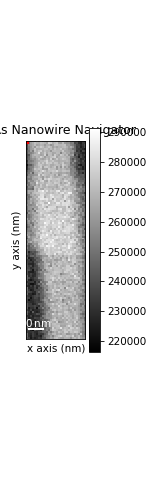

<IPython.core.display.Javascript object>


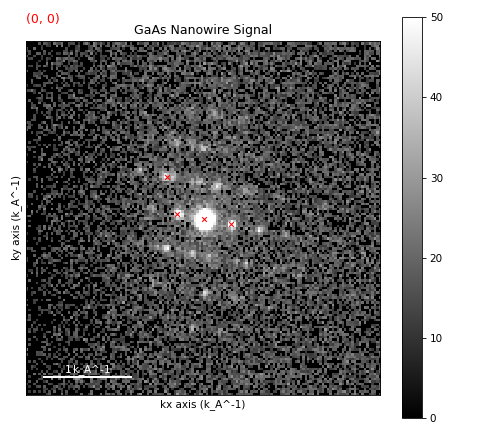

In [30]:
peaks.plot_diffraction_vectors_on_signal(dp, cmap='gray', vmax=50)

<IPython.core.display.Javascript object>


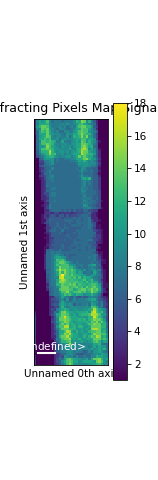

In [31]:
crystim = peaks.get_diffracting_pixels_map(binary=False)
crystim.plot(cmap='viridis')

## Phase and Orientation Mapping:

We will move on to using a different sysem 

<ElectronDiffraction2D, title: GaAs NW (110 zone), dimensions: (20, 45|144, 144)>


<IPython.core.display.Javascript object>


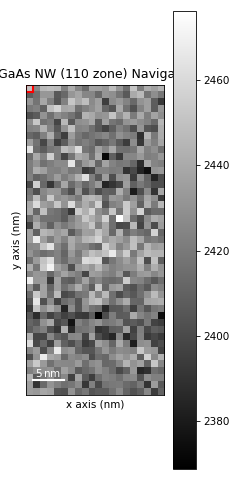

<IPython.core.display.Javascript object>


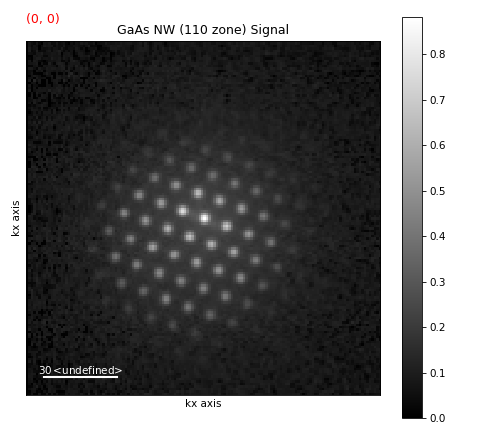

In [32]:
dp = hs.load('./data/02/polymorphic_nanowire.hdf5')
accelarating_voltage = 200  # kV
camera_length = 0.2  # m
diffraction_calibration = 0.032  # px / Angstrom
print(dp)
dp.data = dp.data.astype('float64')
dp.data *= 1 / dp.data.max()
scale_x = 0.995
scale_y = 1.031
offset_x = 0.631
offset_y = -0.351
dp.apply_affine_transformation(np.array([[scale_x, 0, offset_x],
                                         [0, scale_y, offset_y],
                                         [0, 0, 1]]))
dp.plot()

Perform difference of gaussian background subtraction with various parameters on one selected diffraction pattern and plot to identify good parameters

In [33]:
from pyxem.utils.expt_utils import investigate_dog_background_removal_interactive

<IPython.core.display.Javascript object>


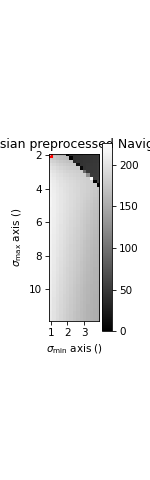

<IPython.core.display.Javascript object>


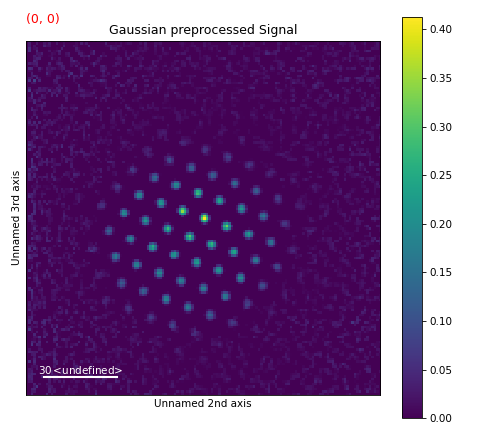

In [34]:
dp_test_area = dp.inav[0, 0]

gauss_stddev_maxs = np.arange(2, 12, 0.2) # min, max, step
gauss_stddev_mins = np.arange(1, 4, 0.2) # min, max, step

investigate_dog_background_removal_interactive(dp_test_area,
                                               gauss_stddev_maxs,
                                               gauss_stddev_mins)

Remove background using difference of gaussians method with parameters identified above

In [35]:
dp = dp.subtract_diffraction_background('difference of gaussians',
                          min_sigma=2, max_sigma=8,
                          lazy_result=False)

[########################################] | 100% Completed |  0.4s


In [36]:
dp.set_signal_type("electron_diffraction") #this is needed because of a bug in the code
dp.set_diffraction_calibration(diffraction_calibration)
dp.set_scan_calibration(10)

<a id='tem'></a>
##  3. Pattern Matching
Pattern matching generates a database of simulated diffraction patterns and then compares all simulated patterns against each experimental pattern to find the best match

Import generators required for simulation and indexation

In [37]:
from diffsims.libraries.structure_library import StructureLibrary
from diffsims.generators.diffraction_generator import DiffractionGenerator
from diffsims.generators.library_generator import DiffractionLibraryGenerator

from diffsims.generators.zap_map_generator import get_rotation_from_z_to_direction
from diffsims.generators.rotation_list_generators import get_grid_around_beam_direction

from pyxem.generators.indexation_generator import TemplateIndexationGenerator

### 3.1. Define Library of Structures & Orientations

Define the crystal phases to be included in the simulated library

In [38]:
structure_zb = diffpy.structure.loadStructure('./data/02/GaAs_mp-2534_conventional_standard.cif')
structure_wz = diffpy.structure.loadStructure('./data/02/GaAs_mp-8883_conventional_standard.cif')

In [39]:
#creating a basic roations list
za110c = get_rotation_from_z_to_direction(structure_zb, [1,1,0])
rot_list_cubic = get_grid_around_beam_direction(beam_rotation=za110c, resolution=1, angular_range=(0,180))
za110h = get_rotation_from_z_to_direction(structure_wz, [1,1,0])
rot_list_hex = get_grid_around_beam_direction(beam_rotation=za110h, resolution=1, angular_range=(0,180))

In [43]:
# Creating a Strucutre Library Object defininf the crystal strcutures which will be simulated. 
struc_lib = StructureLibrary(['ZB','WZ'],
                             [structure_zb,structure_wz],
                             [rot_list_cubic,rot_list_hex])

In [44]:
diff_gen = DiffractionGenerator(accelerating_voltage=accelarating_voltage)
lib_gen = DiffractionLibraryGenerator(diff_gen)

In [45]:
target_pattern_dimension_pixels = dp.axes_manager.signal_shape[0]
half_size = target_pattern_dimension_pixels // 2
reciprocal_radius = diffraction_calibration*(half_size - 1)

diff_lib = lib_gen.get_diffraction_library(struc_lib,
                                           calibration=diffraction_calibration,
                                           reciprocal_radius=reciprocal_radius,
                                           half_shape=(half_size, half_size),
                                           max_excitation_error=1/10,
                                           with_direct_beam=False)

<a id='temb'></a>
###  3.3. Pattern Matching Indexation
Initialize `TemplateIndexationGenerator` with the experimental data and diffraction library and perform correlation, returning the `n_largest` matches with highest correlation.

<div class="alert alert-block alert-warning"><b>Note:</b> This workflow has been changed from previous version, make sure you have pyxem 0.13.0 or later installed</div>

In [46]:
indexer = TemplateIndexationGenerator(dp, diff_lib)
indexation_results = indexer.correlate(n_largest=3)

<IPython.core.display.Javascript object>


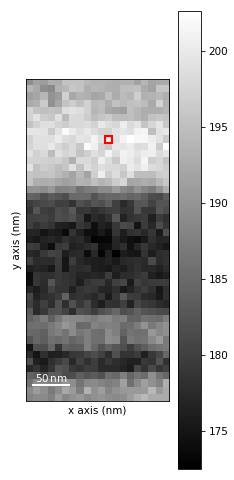

<IPython.core.display.Javascript object>


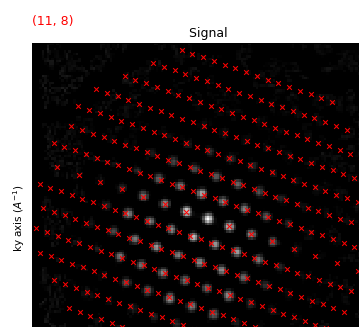

In [47]:
indexation_results.plot_best_matching_results_on_signal(dp, diff_lib)

In [48]:
crystal_map = indexation_results.to_crystal_map()

crystal_map is now a CrystalMap object, which comes from orix, see their documentation for details. Below we lift their code to plot a phase map

/home/carter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


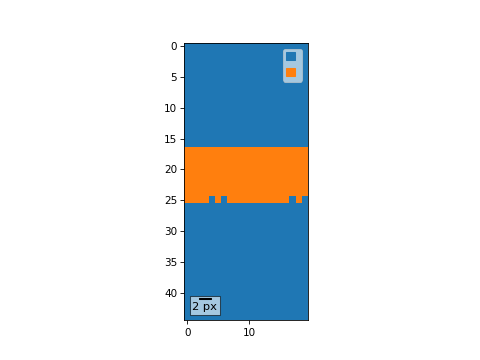

Phase  Orientations  Name  Space group  Point group  Proper point group       Color
    0   724 (80.4%)  None         None         None                None    tab:blue
    1   176 (19.6%)  None         None         None                None  tab:orange
Properties: score
Scan unit: px


In [51]:
from matplotlib import pyplot as plt
from orix import plot

fig, ax = plt.subplots(subplot_kw=dict(projection="plot_map"))
im = ax.plot_map(crystal_map)
print(crystal_map)

In [50]:
crystal_map

Phase  Orientations  Name  Space group  Point group  Proper point group       Color
    0   724 (80.4%)  None         None         None                None    tab:blue
    1   176 (19.6%)  None         None         None                None  tab:orange
Properties: score
Scan unit: px

<a id='tem'></a>
##  3. Angular Correlations and FEM

###  3.1 Data Loading and Visualization

Below we are going to load a dataset 

In [52]:
data = hs.load("./data/09/PdNiP_test.hspy")

In [53]:
data.set_signal_type("electron_diffraction")
data.beam_energy=200
data.unit = "k_nm^-1"

In [54]:
# Affine correction from fitting an ellipse
import numpy as np
center=(31.2,31.7)
affine=np.array([[ 1.03725511, -0.02662789,  0.        ],
                 [-0.02662789,  1.01903215,  0.        ],
                 [ 0.        ,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


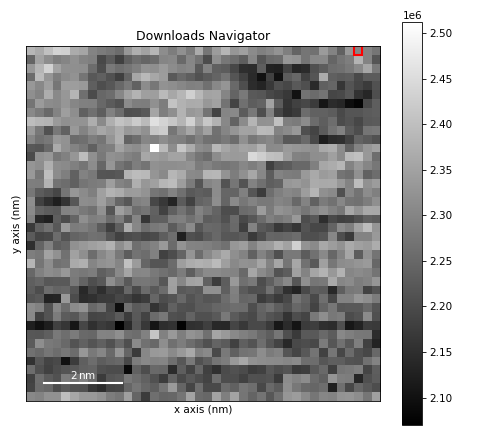

<IPython.core.display.Javascript object>


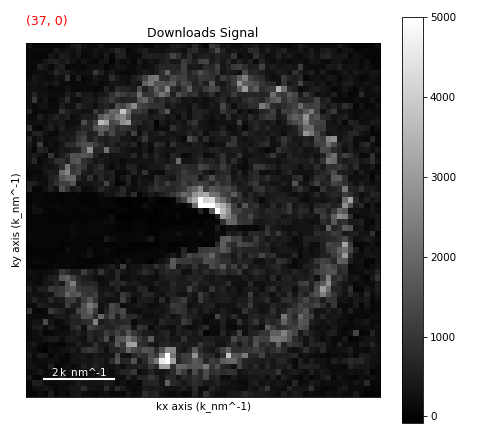

In [72]:
data.plot(vmax=5000)

In [55]:
data.set_ai(center=center)
rad = data.get_azimuthal_integral2d(npt=100)

<IPython.core.display.Javascript object>


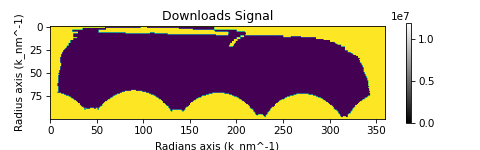

In [56]:
rad.sum().plot()

In [67]:
summed = rad.sum()
mask = ((summed.data>4e6) +(summed.data<3e5))

In [69]:
plt.imshow(mask)

<IPython.core.display.Javascript object>


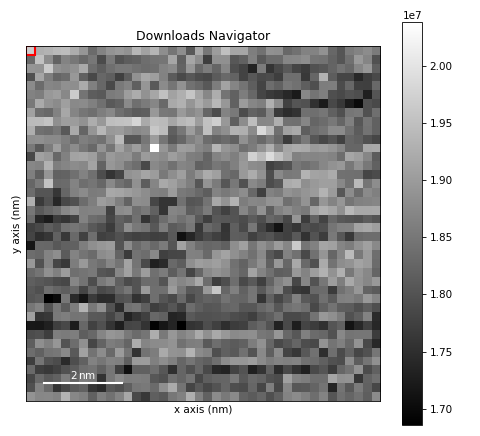

<IPython.core.display.Javascript object>


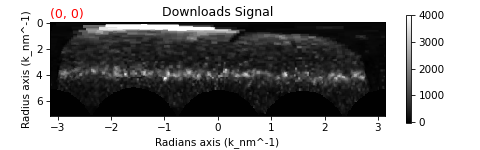

In [70]:
rad.plot(vmax=4000)

In [73]:
cor = rad.get_angular_correlation(mask=mask)

<IPython.core.display.Javascript object>


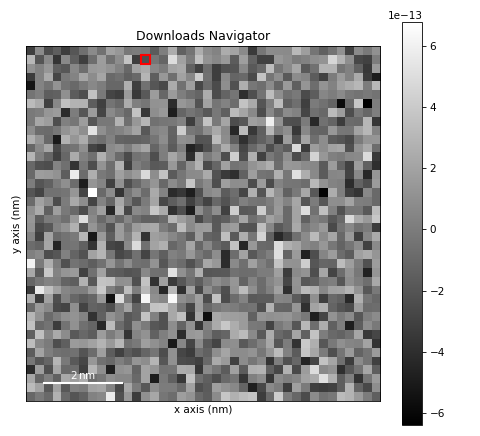

<IPython.core.display.Javascript object>


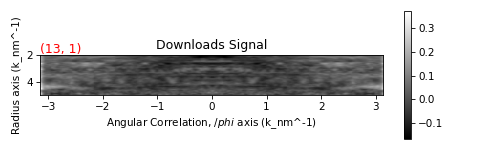

In [77]:
cor.isig[:,2.:5.].plot()

In [78]:
power = cor.get_angular_power()

<IPython.core.display.Javascript object>


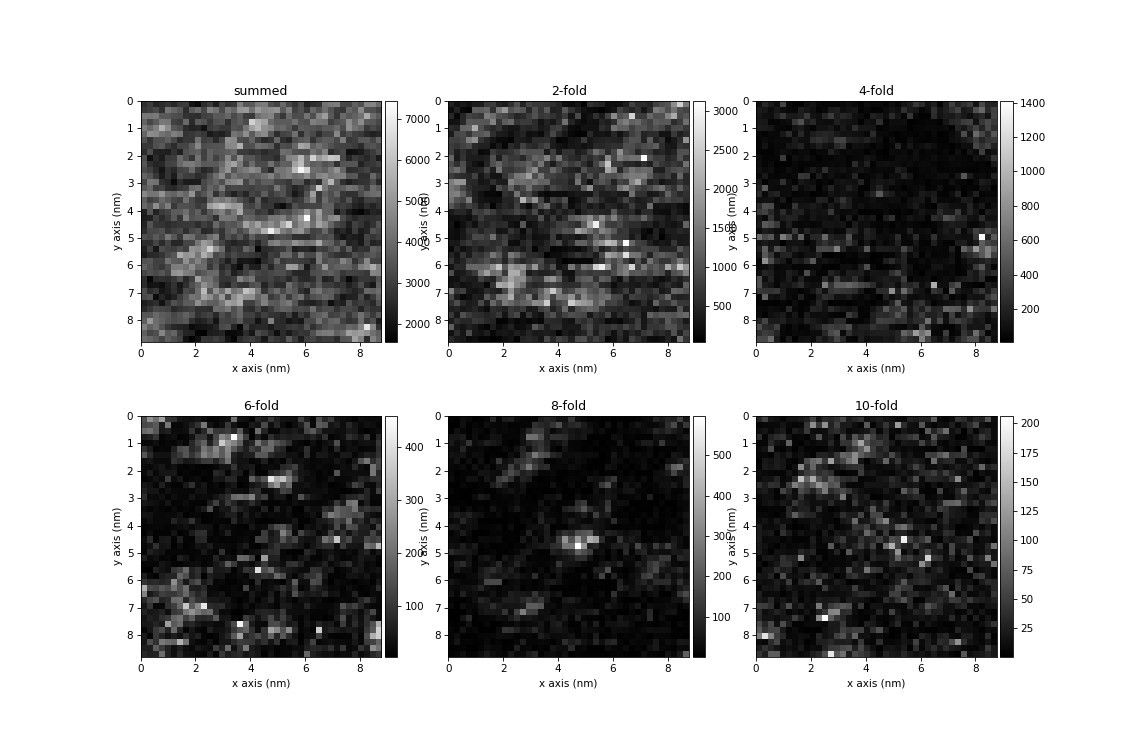

In [82]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,10))
power.plot_symmetries(k_region = [3.,4.5],fig=f)